# Galaxy SDSS similarity matrix

04 April 2016 - <mquartulli@vicomtech.org>

Is the data file there?

In [3]:
! ls -l

total 1306768
-rw-r--r--  1 marcoq  staff    4427116 Apr  6 12:20 010_scikitslearn-rasterio-0.ipynb
-rw-r--r--  1 marcoq  staff    3290497 Apr  6 10:31 020_igarss2015.ipynb
-rw-r--r--  1 marcoq  staff    3242595 Apr  6 09:21 030_Sentinel2LatLonHeightPix-1.ipynb
-rw-r--r--  1 marcoq  staff    2665920 Apr  5 15:44 04_open_source_tools.ipynb
-rw-r--r--  1 marcoq  staff     432488 Apr  6 12:31 05_galaxy_sdss_similarity_matrices.ipynb
-rw-r--r--  1 marcoq  staff     699363 Apr  6 12:32 06_crts.ipynb
-rw-r--r--  1 marcoq  staff    7695830 Apr  6 12:41 06_donostia_geoeuskadi.ipynb
-rw-r-----@ 1 marcoq  staff        643 Apr  6 12:12 IGARSS_shape.dbf
-rw-r-----@ 1 marcoq  staff       1620 Apr  6 12:10 IGARSS_shape.shp
-rw-r-----@ 1 marcoq  staff        148 Apr  6 12:12 IGARSS_shape.shx
-rw-r--r--@ 1 marcoq  staff       1939 May 23  2015 README.md
lrwxr-xr-x  1 marcoq  staff         59 Apr  3 18:36 all_donosti_cropped_wgs4326.tif -> /Users/marcoq/Data/donostia/all_donosti_cropped_wgs4326.tif
-rw

# Read CSV data

Data from the SDSS Catalog 

* <http://skyserver.sdss.org>

In [4]:
import pandas

In [5]:
df = pandas.read_csv('/Users/marcoq/Desktop/bse_ts_2016/galaxies_sdss.csv')

In [6]:
df.head()

,objID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
0,1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835
1,1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640
2,1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263
3,1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660
4,1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173


In [7]:
df['objID'] = df['objID'].astype('category')
df = df.set_index('objID')

The attributes:

* `psfMag_u`: Point Spread Function Magnitude in the U band
* `psfMag_g`: Point Spread Function Magnitude in the G band
* `psfMag_r`: Point Spread Function Magnitude in the R band	
* `psfMag_i`: Point Spread Function Magnitude in the I band
* `psfMag_z`: Point Spread Function Magnitude in the Z band

In [8]:
df.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
objID,,,,,
1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835
1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640
1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263
1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660
1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173


# Data filtering

In [9]:
df.shape

(5000, 5)

In [10]:
df[(df['psfMag_u']>=0) & (df['psfMag_g']>=0)].shape

(4967, 5)

In [11]:
df = df[(df['psfMag_u']>=0) & (df['psfMag_g']>=0)]

In [12]:
df.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
objID,,,,,
1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835
1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640
1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263
1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660
1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173


# Pre-process

Quantities with greater physical significance are be 

* `ug = psfMag_u-psfMag_g`
* `gr = psfMag_g-psfMag_r`
* `ri = psfMag_r-psfMag_i`
* `iz = psfMag_i-psfMag_z`

In [13]:
df['ug'] = df['psfMag_u']-df['psfMag_g']
df['gr'] = df['psfMag_g']-df['psfMag_r']
df['ri'] = df['psfMag_r']-df['psfMag_i']
df['iz'] = df['psfMag_i']-df['psfMag_z']

In [14]:
for c in df.columns:
    if c.startswith('psfMag'):
        del df[c]

In [15]:
df.head()

,ug,gr,ri,iz
objID,,,,
1237648674510995691,1.39062,0.58391,0.25294,0.39978
1237648674510995704,1.67598,0.79500,0.31798,0.38835
1237648674511847548,1.35840,1.01584,0.54071,0.25245
1237648674512109722,1.01438,0.52790,0.33198,0.10532
1237648674512109812,1.95682,1.68776,0.50581,0.37224


# Plot data

In [16]:
%matplotlib inline

In [17]:
from pandas.tools.plotting import scatter_matrix

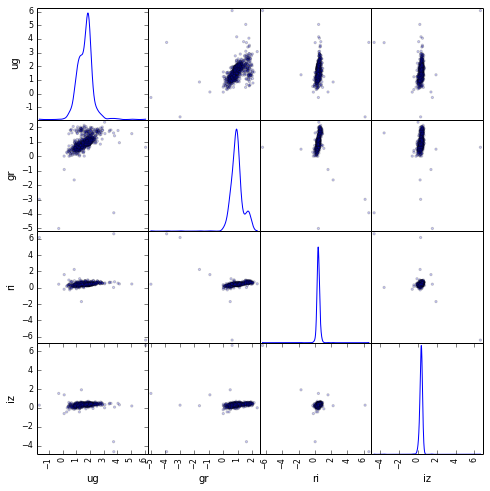

In [240]:
_ = scatter_matrix(df.sample(n=1000), alpha=0.2, figsize=(8, 8), diagonal='kde')

Note: consider the `seaborn` library for better statistical plotting.

# Compute similarities

In [18]:
import sklearn.metrics.pairwise

In [19]:
dist = sklearn.metrics.pairwise.euclidean_distances(df.values)

In [243]:
dist.shape

(4967, 4967)

In [244]:
import matplotlib.pylab

<matplotlib.colorbar.Colorbar instance at 0x112c86b48>

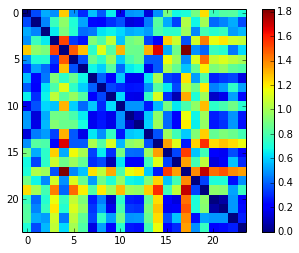

In [245]:
matplotlib.pylab.imshow(dist[:24,:24], interpolation='nearest')
matplotlib.pylab.colorbar()

# Extract outliers by integrating the similarity matrix?

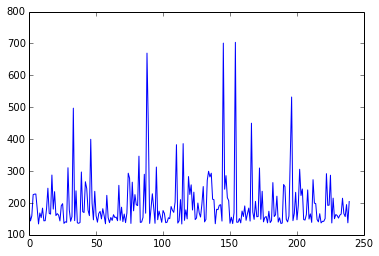

In [246]:
matplotlib.pylab.plot(dist[:240,:240].sum(axis=0))

Compute expected distance from other elements in the dataset.

In [247]:
df['mean_dist'] = dist.sum(axis=0)

In [248]:
df.head()

,ug,gr,ri,iz,mean_dist
objID,,,,,
1237648674510995691,1.39062,0.58391,0.25294,0.39978,3747.504590
1237648674510995704,1.67598,0.79500,0.31798,0.38835,3065.821419
1237648674511847548,1.35840,1.01584,0.54071,0.25245,3411.445151
1237648674512109722,1.01438,0.52790,0.33198,0.10532,4738.192388
1237648674512109812,1.95682,1.68776,0.50581,0.37224,4812.413535


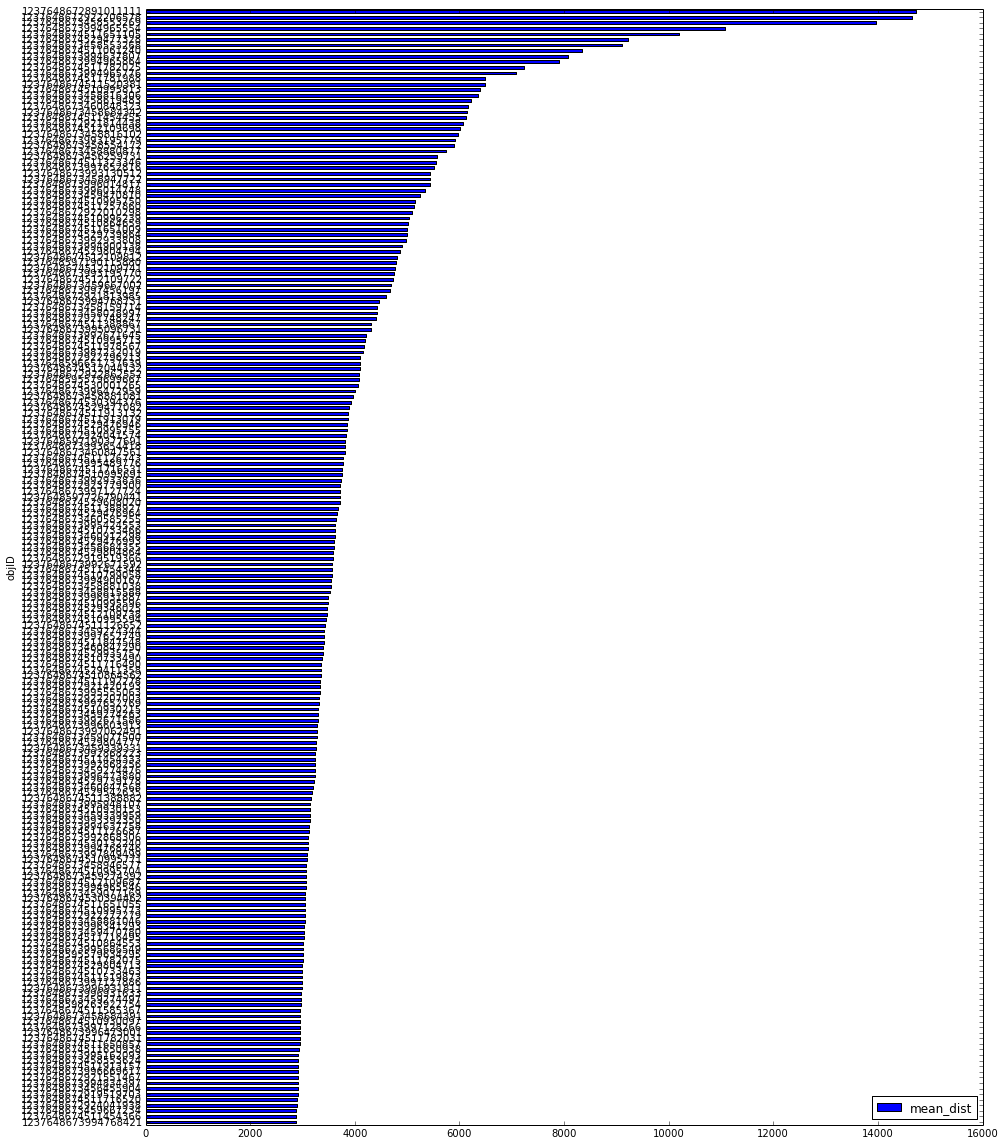

In [275]:
df.head(200).sort('mean_dist').plot(figsize=(15,20), kind='barh',y='mean_dist')

# In Spark

We try it again, this time in Spark, to understand about any differences in the way we need to think about the data.

# Start the cluster

In [20]:
import os
os.environ['SPARK_HOME'] = '/usr/local/spark-1.1.0/'
import sparklingpandas.utils
sparklingpandas.utils.add_pyspark_path()

In [21]:
import pyspark

In [22]:
conf = pyspark.conf.SparkConf()
conf.setAppName(__name__)

In [23]:
sc = pyspark.SparkContext(conf=conf)

In [24]:
sc.master

u'local[*]'

In [25]:
sc.defaultParallelism

4

# Transform the `pandas.DataFrame` to a `pyspark.RDD`

Notice that this is NOT typical. An RDD will generally be created by reading data from a distributed file system such as HDFS or from a DataBase

In [26]:
df.columns[:-1]

Index([u'ug', u'gr', u'ri'], dtype='object')

In [27]:
df[df.columns[:-1]].head()

,ug,gr,ri
objID,,,
1237648674510995691,1.39062,0.58391,0.25294
1237648674510995704,1.67598,0.79500,0.31798
1237648674511847548,1.35840,1.01584,0.54071
1237648674512109722,1.01438,0.52790,0.33198
1237648674512109812,1.95682,1.68776,0.50581


In [28]:
def dataframe2dict(df):
    return { df.index.tolist()[y]:df.values[y,:] for y in range(df.values.shape[0]) }

In [29]:
dataframe2dict(df.head(2))

{1237648674510995691: array([ 1.39062,  0.58391,  0.25294,  0.39978]),
 1237648674510995704: array([ 1.67598,  0.795  ,  0.31798,  0.38835])}

### TODO: remember extending the analysis to all samples in the next block

In [41]:
sc.parallelize(list("pandas")).map(lambda letter: letter.upper()).collect()

['P', 'A', 'N', 'D', 'A', 'S']

In [51]:
sc.parallelize(list("pandas"))\
  .map(lambda letter: letter.upper())\
  .cartesian(sc.parallelize("pandas")).take(5)

[('P', 'p'), ('P', 'a'), ('P', 'n'), ('P', 'd'), ('P', 'a')]

In [30]:
N = 200

In [31]:
df_rdd = sc.parallelize(dataframe2dict(df[df.columns[:-1]].head(N)).iteritems())

# How to think about the `RDD`

It behaves a lot like a list

In [32]:
df_rdd.cartesian(df_rdd).count()

40000

In this case, a list of dictionaries

In [33]:
df_rdd.take(1)

[(1237648673459274497, array([ 1.77415,  1.05643,  0.48578]))]

# Compute cartesian product of item set

We need to do this to go from a linear to a matrix structure

In [36]:
df_rdd.cartesian(df_rdd).take(3)

[((1237648673459274497, array([ 1.77415,  1.05643,  0.48578])),
  (1237648673459274497, array([ 1.77415,  1.05643,  0.48578]))),
 ((1237648673459274497, array([ 1.77415,  1.05643,  0.48578])),
  (1237648673996603913, array([ 1.74776,  1.08495,  0.63485]))),
 ((1237648673459274497, array([ 1.77415,  1.05643,  0.48578])),
  (1237648595579634295, array([ 1.55963,  0.99629,  0.51224])))]

In [53]:
def reformat(row_couple):
    a = row_couple[0]
    b = row_couple[1]
    first_item_identifier = a[0]
    first_item_attributes = a[1]
    second_item_attributes = b[1]
    return (first_item_identifier, first_item_attributes, second_item_attributes)

In [54]:
df_rdd.cartesian(df_rdd)\
      .map(lambda ab:(ab[0][0],ab[0][1],ab[1][1]))\
      .take(3)

[(1237648673459274497,
  array([ 1.77415,  1.05643,  0.48578]),
  array([ 1.77415,  1.05643,  0.48578])),
 (1237648673459274497,
  array([ 1.77415,  1.05643,  0.48578]),
  array([ 1.74776,  1.08495,  0.63485])),
 (1237648673459274497,
  array([ 1.77415,  1.05643,  0.48578]),
  array([ 1.55963,  0.99629,  0.51224]))]

We keep the ID for the first element of the couple: we will need to group distances based on it before computing the mean distance for each element.

Question: does this $N^2$ procedure really make sense?

# Compute euclidean distance matrix by `map`

We keep using `sklearn` to compute the distance between to items.
Note how we can keep using the "Python Data Stack" (`numpy`, `sklearn` and more) because the interpretation is carried out by Python on the worker nodes.

In [55]:
def euclidean_distance(ab):
    import sklearn.metrics
    a = ab[1]
    b = ab[2]
    return sklearn.metrics.pairwise.distance.euclidean(a,b)

Note the `import` inside the function.

The correct yet opaque way to do this is by `sc.addPyFile(sklearn.metrics.__file__)`

In [57]:
dist_rdd = df_rdd.cartesian(df_rdd)\
                 .map(lambda ab:(ab[0][0],ab[0][1],ab[1][1]))\
                 .map(lambda x: (x[0], euclidean_distance(x)))

In [61]:
dist_rdd.sample(withReplacement=False, fraction=0.01).collect()

[(1237648673459274497, 0.69248258043072586),
 (1237648673996603913, 0.28671061438321566),
 (1237648595579634295, 0.5710102685591556),
 (1237648673458881038, 0.55784390818579188),
 (1237648673994768731, 0.923133768421458),
 (1237648674511650857, 1.0159409583730721),
 (1237648673996341293, 0.94913066297533311),
 (1237648673994965554, 2.018046884613935),
 (1237648674529804864, 0.48308050871464403),
 (1237648598263922754, 0.29804013722986905),
 (1237648598263922754, 0.2713372543533219),
 (1237648673459339331, 0.21022976715964631),
 (1237648673992671586, 0.58150650641243806),
 (1237648674511585367, 1.0356067665866198),
 (1237648674511781988, 0.65474581770332685),
 (1237648673458816102, 0.63000071634880006),
 (1237648673459274344, 0.4982667770381633),
 (1237648673992671592, 0.1501541055049789),
 (1237648674512109687, 2.261758364657906),
 (1237648674511126652, 0.0),
 (1237648674511519873, 0.78322690537289552),
 (1237648673459274497, 0.25656100015395839),
 (1237648673996603913, 0.2727903363391

# Integrate to get expectation by `reduce`

In [62]:
dist_rdd.reduceByKey(lambda x,y:x+y)\
        .map(lambda x:(x[0], x[1]/float(N)))\
        .take(20)

[(1237648674529804864, 0.62556986587884544),
 (1237648673997652816, 1.0812626490516226),
 (1237648673460847568, 0.6053889407104921),
 (1237648673992933808, 0.97039606784158206),
 (1237648673456455904, 0.55884456510486624),
 (1237648674530132240, 0.60609485014530673),
 (1237648673993130512, 1.0665899224106796),
 (1237648673992868256, 0.62168316634388032),
 (1237648673995489776, 0.72791098715082481),
 (1237648674529477328, 1.8761613881219927),
 (1237648673994965776, 1.4238930651970145),
 (1237648673459274497, 0.56708598504648555),
 (1237648672921813985, 0.89264397987958488),
 (1237648673459077169, 0.59881376640560202),
 (1237648673997652769, 0.65426231328530049),
 (1237648674511519873, 0.56664999648895764),
 (1237648674510930097, 0.56607698639462301),
 (1237648674511651009, 0.97973917942059918),
 (1237648673996014817, 1.0409395279330358),
 (1237648674510995713, 0.81628821411242058)]

Note the reduction based on the `objID` key

# Sort

In [270]:
dist_rdd.reduceByKey(lambda x,y:x+y)\
        .map(lambda x:(x[0], x[1]/float(N)))\
        .sortBy(lambda x: x[1], ascending=False)\
        .take(3)

[(1237648672891011111, 2.9240792904927329),
 (1237648672922206578, 2.9206215080957891),
 (1237648673458553269, 2.7870867564689767)]

# Collect top N for plotting

In [271]:
df_mean_dist = \
dist_rdd.reduceByKey(lambda x,y:x+y)\
        .map(lambda x:(x[0], x[1]/float(N)))\
        .sortBy(lambda x: x[1], ascending=False)\
        .take(N)

In [272]:
df_spark = pandas.DataFrame(df_mean_dist)
df_spark.columns = [ 'objID', 'mean_dist' ]
df_spark['objID'] = df_spark['objID'].astype('category')
df_spark.set_index('objID').head()

,mean_dist
objID,
1237648672891011111,2.924079
1237648672922206578,2.920622
1237648673458553269,2.787087
1237648673994965554,2.223116
1237648674511651105,2.079221


In [277]:
df_spark.shape

(200, 2)

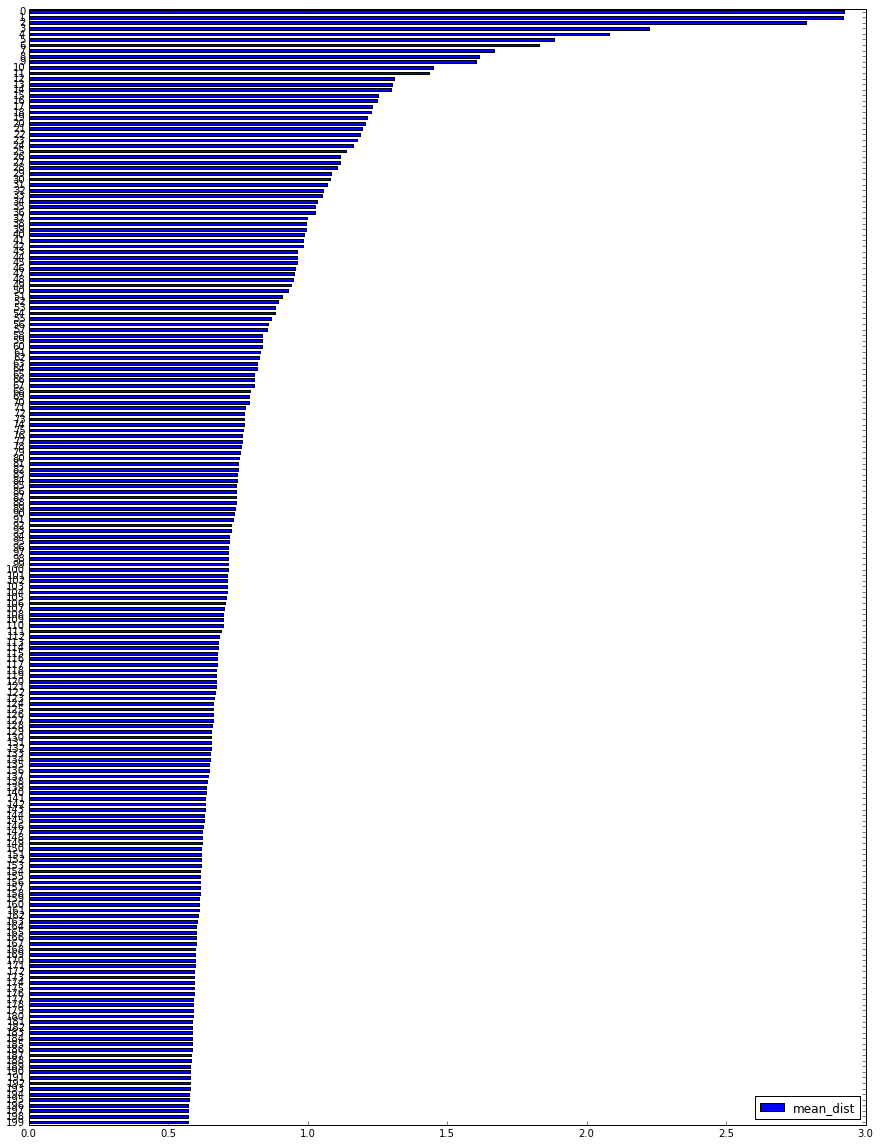

In [278]:
df_spark.sort('mean_dist').plot(figsize=(15,20), kind='barh',y='mean_dist')